#Regresión Lasso

**Alumno: Damian Silva Fernandez**

Este trabajo esta inspirado en el libro "**Elements of Statistical Learning**"

In [10]:
#En primer lugar, importamos  las librerias
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import os 
from efficient_apriori import apriori 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas_datareader as pdr 
#Esta libreria esta diseñada para extraer informacion de software financieros (como Eikon o Yahoo Finance)
import datetime as date
from time import time

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
#Elijo las fechas que voy a utilizar (fecha de inicio y cierre)
endate = date.datetime(2019,1,11)
startdate = date.datetime(2010,1,1)
#Ahora elijo un ticker (vamos a usar el indice MSCI, por poner un ejemplo)
tick = '^GSPC'

In [4]:
data = pdr.get_data_yahoo(tick, start = startdate, end = endate)
print(data.head(500))

                   High          Low         Open        Close      Volume  \
Date                                                                         
2010-01-04  1133.869995  1116.560059  1116.560059  1132.989990  3991400000   
2010-01-05  1136.630005  1129.660034  1132.660034  1136.520020  2491020000   
2010-01-06  1139.189941  1133.949951  1135.709961  1137.140015  4972660000   
2010-01-07  1142.459961  1131.319946  1136.270020  1141.689941  5270680000   
2010-01-08  1145.390015  1136.219971  1140.520020  1144.979980  4389590000   
2010-01-11  1149.739990  1142.020020  1145.959961  1146.979980  4255780000   
2010-01-12  1143.810059  1131.770020  1143.810059  1136.219971  4716160000   
2010-01-13  1148.400024  1133.180054  1137.310059  1145.680054  4170360000   
2010-01-14  1150.410034  1143.800049  1145.680054  1148.459961  3915200000   
2010-01-15  1147.770020  1131.390015  1147.719971  1136.030029  4758730000   
2010-01-19  1150.449951  1135.770020  1136.030029  1150.229980  

**Primer Ejercicio: Regresion Lineal**

En el conjunto de datos "data" se encuentran las siguientes columnas para diferentes variables explicativas del ticker:

X1: precio mas alto durante la rueda
X2: precio mas bajo durante la rueda
X3: precio de apertura
X4: precio de cierre
X5: volumen de contratos
X6: ajuste



In [11]:
#Analisis exploratorio de datos
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2272.000000,2272.000000,2272.000000,2272.000000,2.272000e+03,2272.000000
mean,1867.799842,1849.138935,1858.856741,1859.220902,3.735227e+09,1859.220902
std,522.647513,520.331090,521.662664,521.336046,8.327725e+08,521.336046
min,1032.949951,1010.909973,1027.650024,1022.580017,1.025000e+09,1022.580017
25%,1358.127502,1341.837463,1352.275024,1353.072479,3.240138e+09,1353.072479
50%,1925.474976,1893.509949,1910.474976,1910.845032,3.610615e+09,1910.845032
75%,2175.994934,2163.302490,2170.377441,2171.054993,4.108900e+09,2171.054993
max,2940.909912,2927.110107,2936.760010,2930.750000,1.061781e+10,2930.750000


Se hace una primera observación de las variables por separado con el histograma y luego la correlación entre ellas:

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999689,0.999838,0.999772,-0.286637,0.999772
Low,0.999689,1.000000,0.999739,0.999819,-0.298030,0.999819
Open,0.999838,0.999739,1.000000,0.999565,-0.290156,0.999565
Close,0.999772,0.999819,0.999565,1.000000,-0.293292,1.000000
Volume,-0.286637,-0.298030,-0.290156,-0.293292,1.000000,-0.293292
Adj Close,0.999772,0.999819,0.999565,1.000000,-0.293292,1.000000


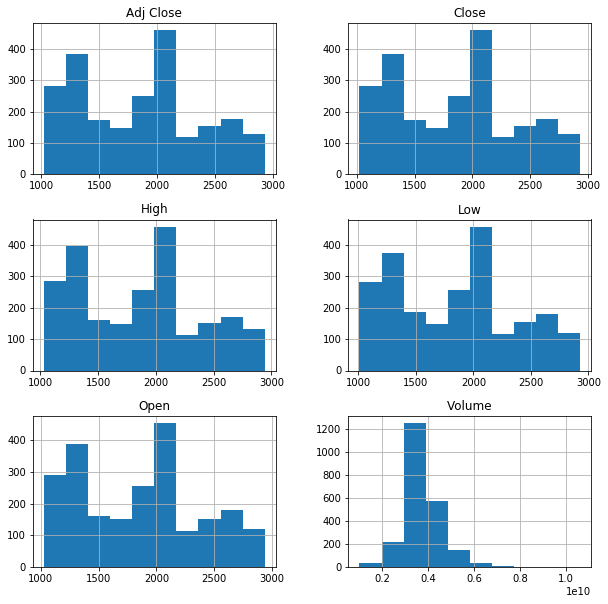

In [12]:
data.hist(figsize=(10,10));
data.corr()

En primer lugar, se separa la variable target de las variables explicativas:

In [25]:
# separación de las variables objetivo y explicativas


x = data[["Open", "Volume", "Adj Close"]]
y = data["Close"]

Regresión Lineal
Mediante una comparativa entre un modelo con término independiente o sin término independiente, vamos a ver cuál de los dos explican la regresión, mayor $R^2$.

In [27]:
model = LinearRegression()
model.fit(x,y)
print('R2 con término independiente:', model.score(x,y))
model_sin = LinearRegression(fit_intercept = False)
model_sin.fit(x,y)
print('R2 sin término independiente:', model_sin.score(x,y))

R2 con término independiente: 1.0
R2 sin término independiente: 1.0
